### IE 7275 - Assignment 3 - Explonatory Data Analysis & Feature selection 

In [151]:
from datetime import date
studentName="Qi Li"
studentEmail="li.qi8@northeastern.edu"
homework=3
contributedPercentage=100
print("IE 7275: Data mining in Engineering")
print("\n"*15)
print(f'Homework - {homework}')
print(f'Student name : {studentName}')
print(f'Student Email : {studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7275: Data mining in Engineering
















Homework - 3
Student name : Qi Li
Student Email : li.qi8@northeastern.edu
















Percentage of Effort Contributed by Student : 100%
Submission Date: 2023-03-07


In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install openpyxl

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score, mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score,regressionSummary
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition
from sklearn.linear_model import Lasso
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### About the dataset：

The Air Quality dataset is a dataset provided by the UCI Machine Learning Repository. This dataset contains data on air quality in Milan, Italy. It has 9358 rows and 15 columns and some of the variables have negative values. The target variable in this dataset is ozone, which is a measure of air quality. The dataset also contains other variables such as temperature, humidity, and wind speed, which may be useful in predicting ozone levels

Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

Attribute Information:
0 Date (DD/MM/YYYY)
1 Time (HH.MM.SS)
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7 True hourly averaged NOx concentration in ppb (reference analyzer)
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12 Temperature in Â°C
13 Relative Humidity (%)
14 AH Absolute Humidity

source: https://archive.ics.uci.edu/ml/datasets/Air+quality#

### Load and process the data

In [153]:
# load data
df = pd.read_excel('/Users/liqi/Desktop/IE7275/Assignment/Assignment 3/AirQualityUCI.xlsx')

# List the first 5 records
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [154]:
# since the time column is object, we need to change it to int so we can use it in the following analysis
df['Time'] = df['Time'].astype("str").str.split(":").str.get(0).astype('int')

# I also dropped the date column because I will not use it in the following analysis
df = df.drop(df.columns[0], axis=1)

# put the target PT08.S5(O3) column at last
cols = list(df.drop('PT08.S5(O3)',axis=1).columns)
cols.append('PT08.S5(O3)')
df = df.reindex(columns=cols)

# show the dataframe
df

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),T,RH,AH,PT08.S5(O3)
0,18,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,13.600,48.875001,0.757754,1267.50
1,19,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,13.300,47.700000,0.725487,972.25
2,20,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,11.900,53.975000,0.750239,1074.00
3,21,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,11.000,60.000000,0.786713,1203.25
4,22,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,11.150,59.575001,0.788794,1110.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,21.850,29.250000,0.756824,1728.50
9353,11,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,24.325,23.725000,0.711864,1269.00
9354,12,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,26.900,18.350000,0.640649,1092.00
9355,13,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,28.325,13.550000,0.513866,769.75


In [155]:
# We can see from above discription that the missing values are tagged with -200 value, so we need to replace the
# null data from -200 to NA

df.replace(to_replace = -200, value = np.nan, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   int64  
 1   CO(GT)         7674 non-null   float64
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
 13  PT08.S5(O3)    8991 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 1023.5 KB


In [156]:
# check the ratio of the missing values of a particular column
CO_ratio = df['CO(GT)'].isna().sum()/len(df['CO(GT)'])
PT08_ratio = df['PT08.S1(CO)'].isna().sum()/len(df['PT08.S1(CO)'])
NMHC_ratio = df['NMHC(GT)'].isna().sum()/len(df['NMHC(GT)'])
CO_ratio
PT08_ratio
NMHC_ratio

0.17986534145559474

0.0391151009939083

0.9023191193758683

In [157]:
# We can see from above that in column NMHC(GT) has a missing value ratio of 0.9023 so we need to drop this column.
df.drop('NMHC(GT)', axis = 1, inplace = True)
df.columns

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH',
       'PT08.S5(O3)'],
      dtype='object')

In [158]:
# find the missing values: after we use NA to fill the dataset, there is a lot NA values
df.isnull().sum().sort_values(ascending = False)

CO(GT)           1683
NO2(GT)          1642
NOx(GT)          1639
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
PT08.S3(NOx)      366
PT08.S4(NO2)      366
T                 366
RH                366
AH                366
PT08.S5(O3)       366
Time                0
dtype: int64

In [159]:
# We can see from above that there are a lot of missing values in CO(GT), NO2(GT) and NOx(GT), so we need to inplace
# them with the mean value
df['CO(GT)'].fillna((df['CO(GT)'].mean()),inplace = True)
df['NO2(GT)'].fillna((df['NO2(GT)'].mean()),inplace = True)
df['NOx(GT)'].fillna((df['NOx(GT)'].mean()),inplace = True)

# then we can drop the left na values
df.dropna(inplace = True)
df.isnull().sum()
df

Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
T                0
RH               0
AH               0
PT08.S5(O3)      0
dtype: int64

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),T,RH,AH,PT08.S5(O3)
0,18,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,13.600,48.875001,0.757754,1267.50
1,19,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,13.300,47.700000,0.725487,972.25
2,20,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,11.900,53.975000,0.750239,1074.00
3,21,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,11.000,60.000000,0.786713,1203.25
4,22,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,11.150,59.575001,0.788794,1110.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,21.850,29.250000,0.756824,1728.50
9353,11,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,24.325,23.725000,0.711864,1269.00
9354,12,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,26.900,18.350000,0.640649,1092.00
9355,13,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,28.325,13.550000,0.513866,769.75


In [160]:
# find the duplicate data: we can see that there is no duplicate data in this dataset.
print(df.duplicated().sum())
df.duplicated()

0


0       False
1       False
2       False
3       False
4       False
        ...  
9352    False
9353    False
9354    False
9355    False
9356    False
Length: 8991, dtype: bool

### EDA

In [161]:
# show the dimensions
print("Dimensions: ", df.shape, "\n")

# show the data types
print(df.info(), "\n")

# check the columns
print(df.columns, "\n")

Dimensions:  (8991, 13) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           8991 non-null   int64  
 1   CO(GT)         8991 non-null   float64
 2   PT08.S1(CO)    8991 non-null   float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        8991 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        8991 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   T              8991 non-null   float64
 10  RH             8991 non-null   float64
 11  AH             8991 non-null   float64
 12  PT08.S5(O3)    8991 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 983.4 KB
None 

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH',


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),T,RH,AH,PT08.S5(O3)
Time,1.000000,0.324347,0.328029,0.344149,0.389194,0.201280,-0.323662,0.331086,0.221248,0.206570,-0.295836,-0.018627,0.245066
CO(GT),0.324347,1.000000,0.799798,0.840128,0.822748,0.751402,-0.634828,0.634951,0.577283,0.020952,0.044678,0.044750,0.784940
PT08.S1(CO),0.328029,0.799798,1.000000,0.883821,0.892972,0.649545,-0.771918,0.584050,0.682874,0.048628,0.114607,0.135323,0.899326
C6H6(GT),0.344149,0.840128,0.883821,1.000000,0.981962,0.650500,-0.735711,0.556229,0.765717,0.198891,-0.061643,0.167909,0.865727
PT08.S2(NMHC),0.389194,0.822748,0.892972,0.981962,1.000000,0.634612,-0.796687,0.582415,0.777235,0.241330,-0.090352,0.186906,0.880590
NOx(GT),0.201280,0.751402,0.649545,0.650500,0.634612,1.000000,-0.593958,0.758107,0.216727,-0.248500,0.203074,-0.133743,0.725722
PT08.S3(NOx),-0.323662,-0.634828,-0.771918,-0.735711,-0.796687,-0.593958,1.000000,-0.590832,-0.538460,-0.145133,-0.056730,-0.232021,-0.796554
NO2(GT),0.331086,0.634951,0.584050,0.556229,0.582415,0.758107,-0.590832,1.000000,0.146210,-0.171499,-0.083660,-0.302089,0.653107
PT08.S4(NO2),0.221248,0.577283,0.682874,0.765717,0.777235,0.216727,-0.538460,0.146210,1.000000,0.561333,-0.032188,0.629644,0.591137
T,0.206570,0.020952,0.048628,0.198891,0.241330,-0.248500,-0.145133,-0.171499,0.561333,1.000000,-0.578569,0.656471,-0.027193


<Figure size 1000x700 with 0 Axes>

<AxesSubplot: >

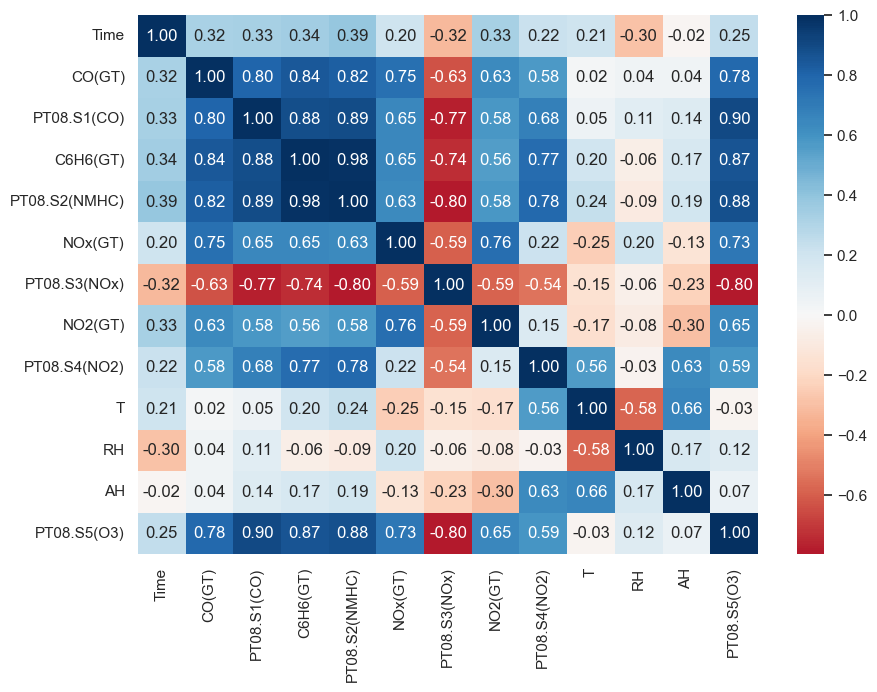

In [162]:
# Correlation analysis: show the correlation in table and in heatmap.
corr = df.corr()
display(corr)
plt.figure(figsize = (10,7))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, 
            fmt = ".2f", cmap = "RdBu", center = 0)

We can see from the plot that there are a lot of attributes have a strong correlation: such as CO(GT) with PT08.S5(O3), PT08.S1(CO) with PT08.S5(O3), C6H6(GT) with PT08.S5(O3), and so on. Therefore we can conclude that these attributes have a strong connection with the target attribute PT08.S5(O3).

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='CO(GT)', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of CO(GT)')

Text(0.5, 0, 'CO(GT)')

Text(0, 0.5, 'Frequency')

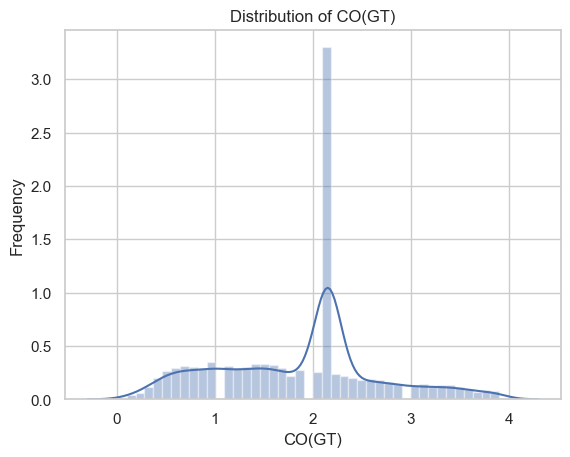

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='PT08.S1(CO)', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of PT08.S1(CO)')

Text(0.5, 0, 'PT08.S1(CO)')

Text(0, 0.5, 'Frequency')

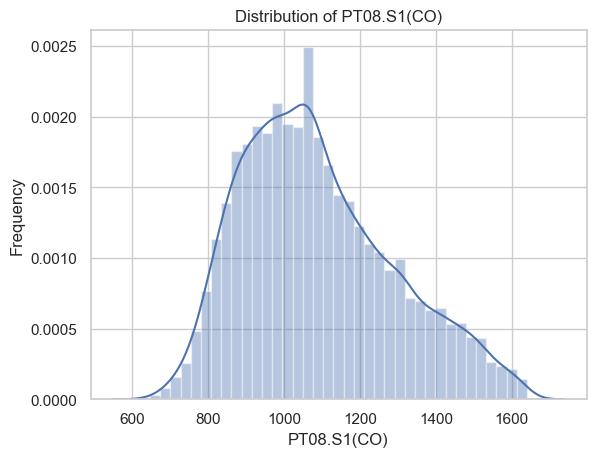

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='C6H6(GT)', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of C6H6(GT)')

Text(0.5, 0, 'C6H6(GT)')

Text(0, 0.5, 'Frequency')

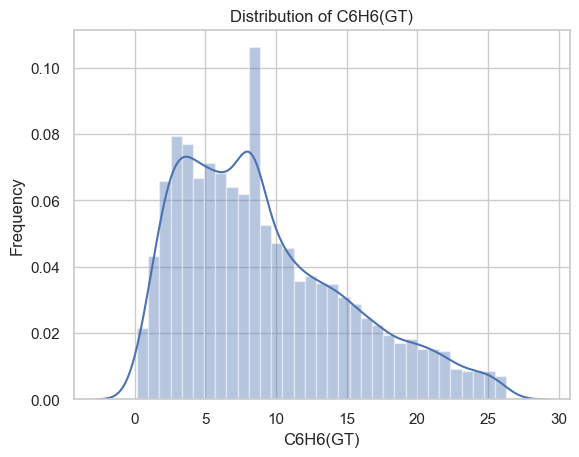

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='PT08.S2(NMHC)', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of PT08.S2(NMHC)')

Text(0.5, 0, 'PT08.S2(NMHC)')

Text(0, 0.5, 'Frequency')

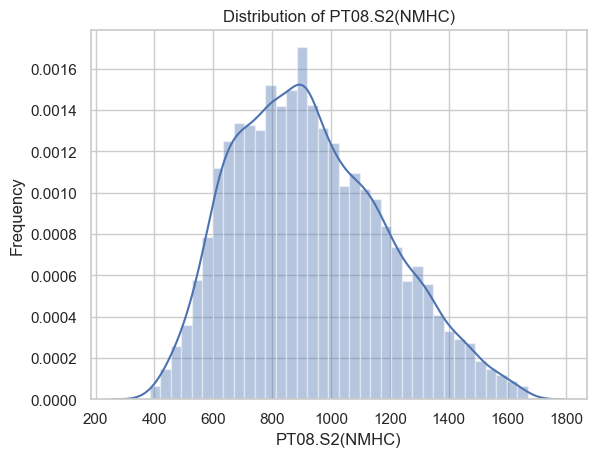

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='NOx(GT)', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of NOx(GT)')

Text(0.5, 0, 'NOx(GT)')

Text(0, 0.5, 'Frequency')

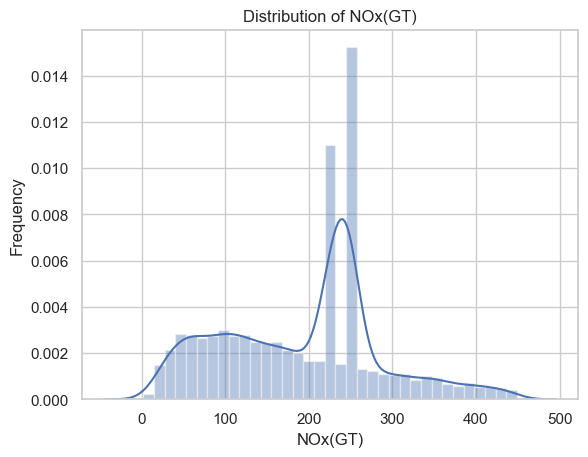

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='PT08.S3(NOx)', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of PT08.S3(NOx)')

Text(0.5, 0, 'PT08.S3(NOx)')

Text(0, 0.5, 'Frequency')

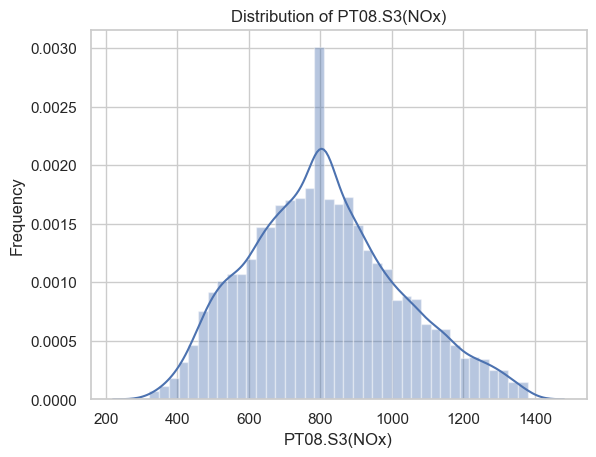

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='NO2(GT)', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of NO2(GT)')

Text(0.5, 0, 'NO2(GT)')

Text(0, 0.5, 'Frequency')

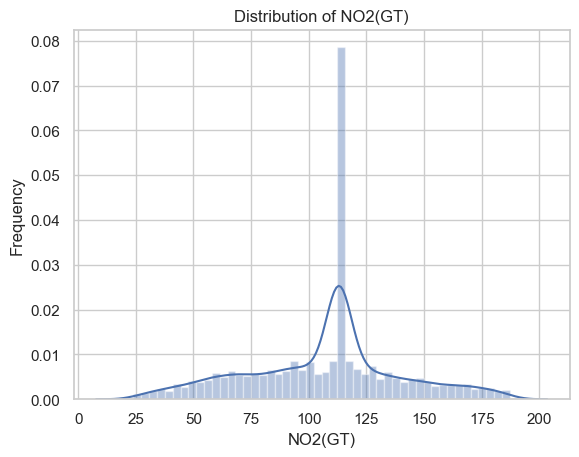

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='PT08.S4(NO2)', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of PT08.S4(NO2)')

Text(0.5, 0, 'PT08.S4(NO2)')

Text(0, 0.5, 'Frequency')

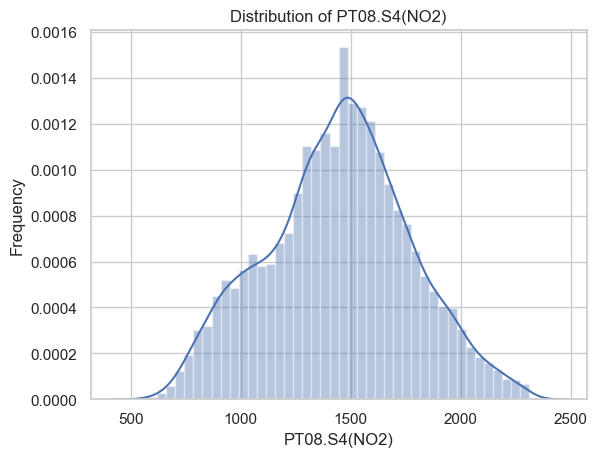

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='T', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of T')

Text(0.5, 0, 'T')

Text(0, 0.5, 'Frequency')

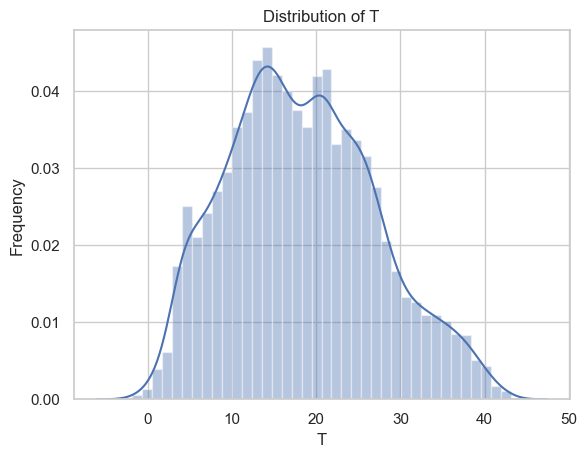

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='RH', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of RH')

Text(0.5, 0, 'RH')

Text(0, 0.5, 'Frequency')

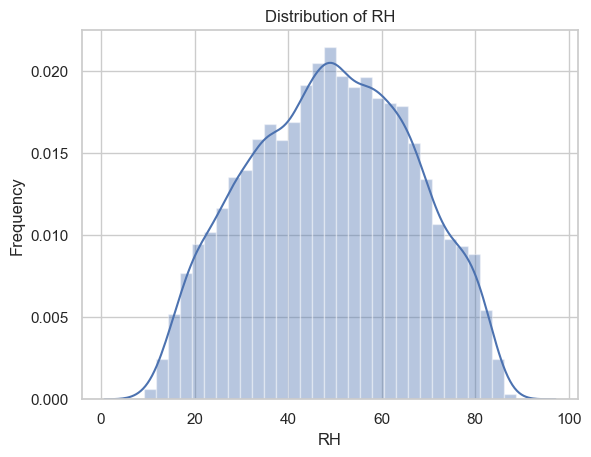

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AH', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of AH')

Text(0.5, 0, 'AH')

Text(0, 0.5, 'Frequency')

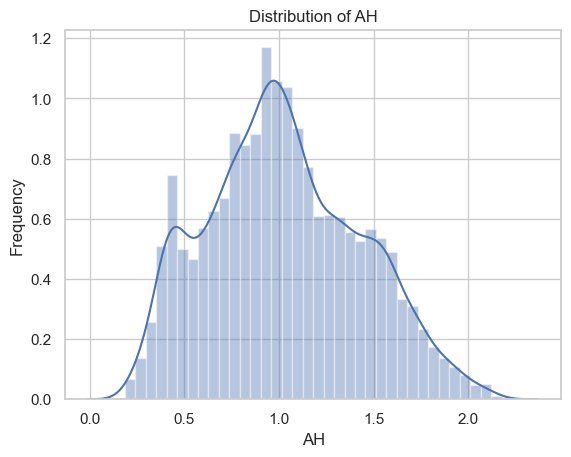

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='PT08.S5(O3)', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of PT08.S5(O3)')

Text(0.5, 0, 'PT08.S5(O3)')

Text(0, 0.5, 'Frequency')

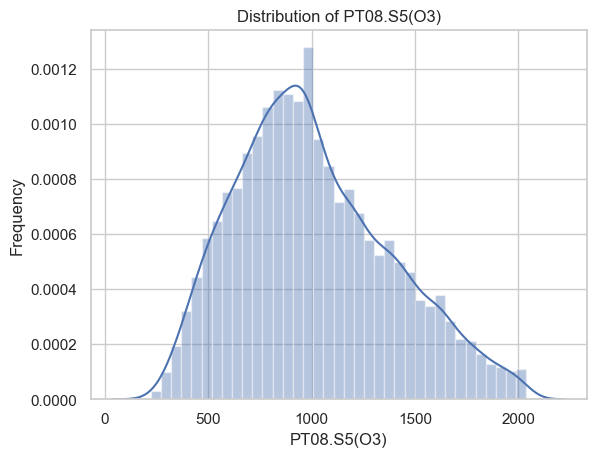

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='Temp_Humid', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Temp_Humid')

Text(0.5, 0, 'Temp_Humid')

Text(0, 0.5, 'Frequency')

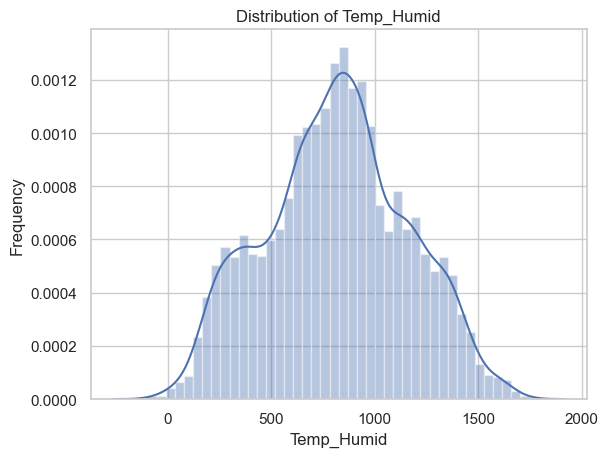

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='Temp_O3', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of Temp_O3')

Text(0.5, 0, 'Temp_O3')

Text(0, 0.5, 'Frequency')

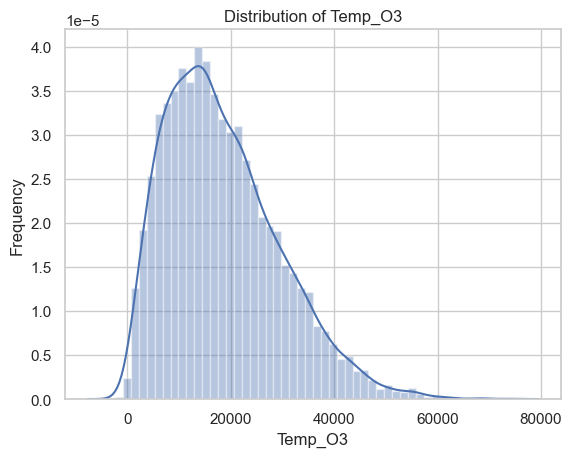

In [150]:
# show the distribution of varibles in plot:
sns.set_theme(style="whitegrid")
for col in df.columns[1:]:
    plt.figure()
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

We can see from the above plot that except CO(GT), NOx(GT), C6H6(GT), and NO2(GT), other attributes almost follow the normal distribution

### Feature engineering

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='CO(GT)'>

Text(0.5, 1.0, 'Boxplot of CO(GT)')

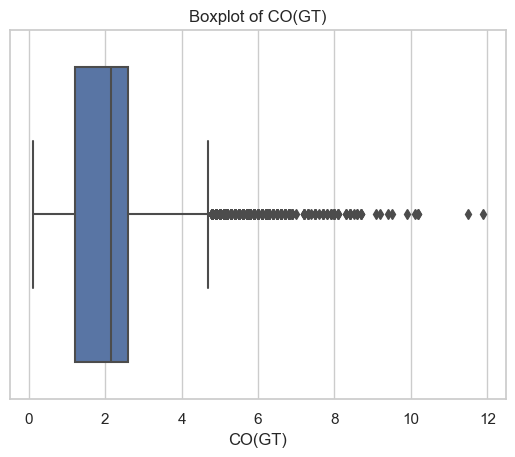

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='PT08.S1(CO)'>

Text(0.5, 1.0, 'Boxplot of PT08.S1(CO)')

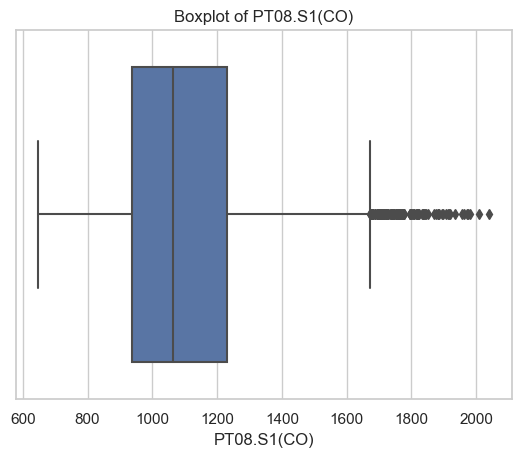

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='C6H6(GT)'>

Text(0.5, 1.0, 'Boxplot of C6H6(GT)')

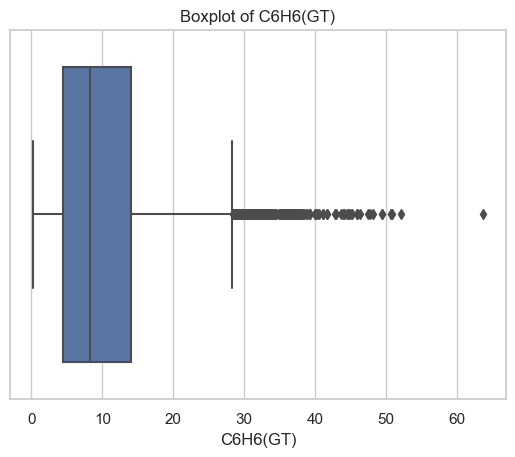

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='PT08.S2(NMHC)'>

Text(0.5, 1.0, 'Boxplot of PT08.S2(NMHC)')

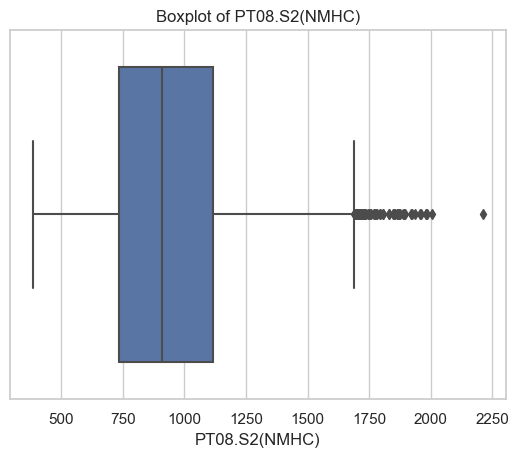

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='NOx(GT)'>

Text(0.5, 1.0, 'Boxplot of NOx(GT)')

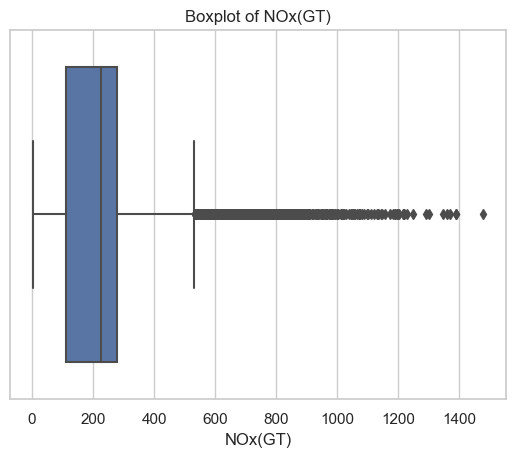

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='PT08.S3(NOx)'>

Text(0.5, 1.0, 'Boxplot of PT08.S3(NOx)')

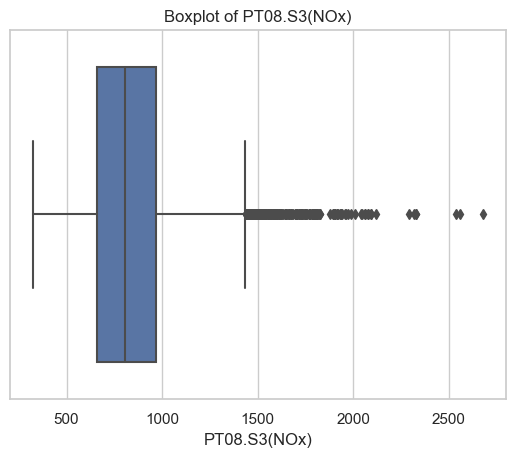

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='NO2(GT)'>

Text(0.5, 1.0, 'Boxplot of NO2(GT)')

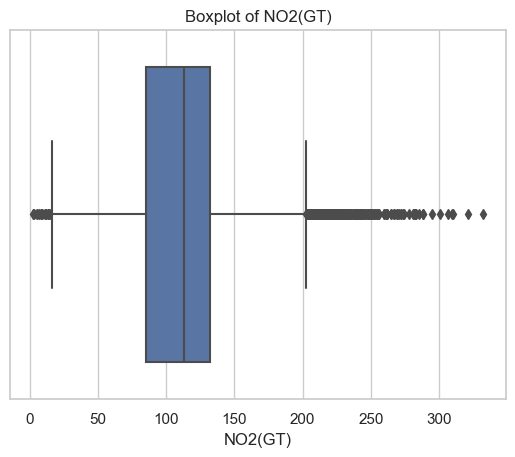

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='PT08.S4(NO2)'>

Text(0.5, 1.0, 'Boxplot of PT08.S4(NO2)')

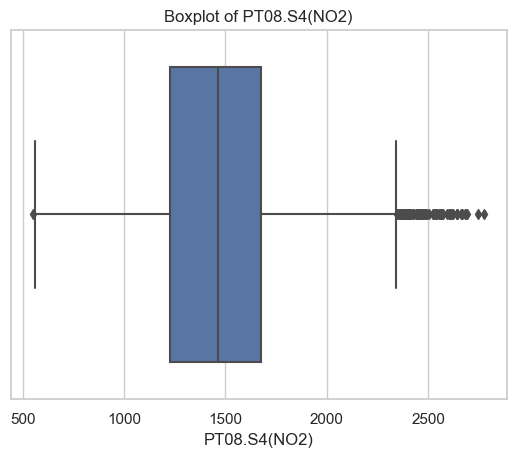

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='T'>

Text(0.5, 1.0, 'Boxplot of T')

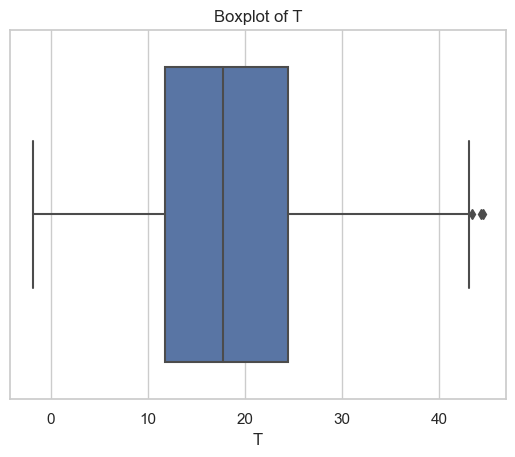

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='RH'>

Text(0.5, 1.0, 'Boxplot of RH')

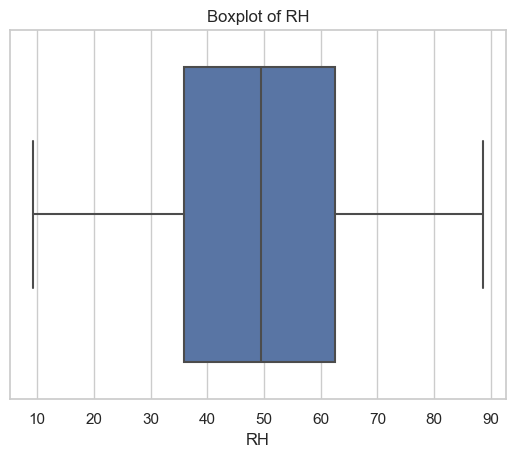

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='AH'>

Text(0.5, 1.0, 'Boxplot of AH')

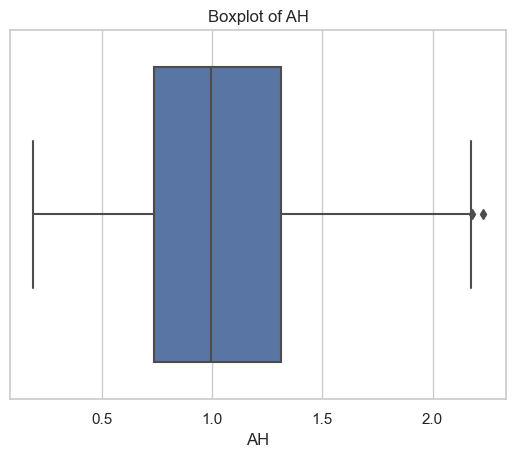

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='PT08.S5(O3)'>

Text(0.5, 1.0, 'Boxplot of PT08.S5(O3)')

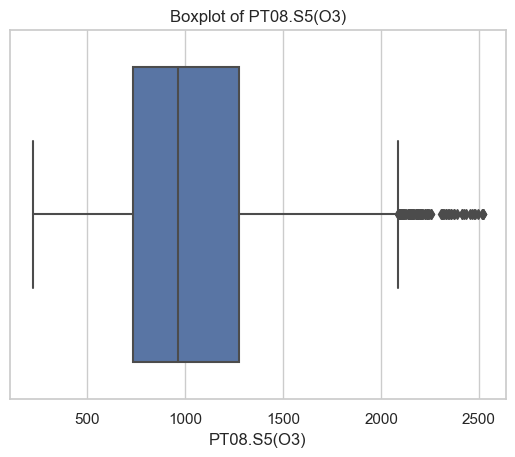

In [55]:
# use boxplot to find the outliers: 
sns.set_theme(style="whitegrid")
for col in df.columns[1:]:
    plt.figure()
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

We can see from the above plot that there are a lot of outliers in CO(GT), PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), and PT08.S5(O3).

In [60]:
# so we need to replace the outliers with median
for feature in ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)','NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 
                'PT08.S4(NO2)', 'PT08.S5(O3)']:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), df[feature].median(), df[feature])

df

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),T,RH,AH,PT08.S5(O3)
0,18,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.000000,1692.00,13.600,48.875001,0.757754,1267.50
1,19,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.000000,1558.75,13.300,47.700000,0.725487,972.25
2,20,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.000000,1554.50,11.900,53.975000,0.750239,1074.00
3,21,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.000000,1583.75,11.000,60.000000,0.786713,1203.25
4,22,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.000000,1490.00,11.150,59.575001,0.788794,1110.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,10,3.1,1314.25,13.529605,1101.25,227.0,538.50,113.075515,1374.25,21.850,29.250000,0.756824,1728.50
9353,11,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.200000,1263.50,24.325,23.725000,0.711864,1269.00
9354,12,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.700000,1240.75,26.900,18.350000,0.640649,1092.00
9355,13,2.1,1002.50,9.547187,960.50,234.5,701.50,155.700000,1041.00,28.325,13.550000,0.513866,769.75


In [63]:
# Creating new features

#'Temp_Humid' is created by adding the 'RH' (relative humidity) and 'T' (temperature) features together
df['Temp_Humid'] = df['T'] * df['RH']

# 'Temp_O3' is created by adding the 'O3' (ozone) and 'T' (temperature) features together
df['Temp_O3'] = df['T'] * df['PT08.S5(O3)']

df.head(10)

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),T,RH,AH,PT08.S5(O3),Temp_Humid,Temp_O3
0,18,2.6,1360.00,11.881723,1045.50,166.000000,1056.25,113.000000,1692.00,13.600,48.875001,0.757754,1267.50,664.700008,17237.999879
1,19,2.0,1292.25,9.397165,954.75,103.000000,1173.75,92.000000,1558.75,13.300,47.700000,0.725487,972.25,634.409995,12930.924954
2,20,2.2,1402.00,8.997817,939.25,131.000000,1140.00,114.000000,1554.50,11.900,53.975000,0.750239,1074.00,642.302510,12780.600102
3,21,2.2,1375.50,9.228796,948.25,172.000000,1092.00,122.000000,1583.75,11.000,60.000000,0.786713,1203.25,660.000000,13235.750000
4,22,1.6,1272.25,6.518224,835.50,131.000000,1205.00,116.000000,1490.00,11.150,59.575001,0.788794,1110.00,664.261264,12376.500106
5,23,1.2,1197.00,4.741012,750.25,89.000000,1336.50,96.000000,1393.00,11.175,59.175000,0.784772,949.25,661.280638,10607.868931
6,0,1.2,1185.00,3.624399,689.50,62.000000,805.50,77.000000,1332.75,11.325,56.775000,0.760312,732.50,642.976860,8295.562360
7,1,1.0,1136.25,3.326677,672.00,62.000000,805.50,76.000000,1332.75,10.675,60.000000,0.770238,729.50,640.499997,7787.412465
8,2,0.9,1094.00,2.339416,608.50,45.000000,805.50,60.000000,1276.00,10.650,59.674999,0.764819,619.50,635.538748,6597.675059
9,3,0.6,1009.75,1.696658,560.75,246.881252,805.50,113.075515,1234.75,10.250,60.200001,0.751657,501.25,617.050022,5137.812620


### Feature selection

#### 1. Correlation analysis

In [65]:
# Calculating correlation matrix and selecting features with high correlation to target variable 'PT08.S5(O3)'
corr_matrix = df.corr()
print(corr_matrix['PT08.S5(O3)'].sort_values(ascending=False))

PT08.S5(O3)      1.000000
PT08.S1(CO)      0.860366
PT08.S2(NMHC)    0.847952
C6H6(GT)         0.800821
CO(GT)           0.784958
NO2(GT)          0.669451
NOx(GT)          0.652024
Temp_O3          0.577580
PT08.S4(NO2)     0.548102
Hour             0.235548
RH               0.122293
Temp_Humid       0.109661
AH               0.083454
T               -0.015105
PT08.S3(NOx)    -0.778743
Name: PT08.S5(O3), dtype: float64


We can see from above that PT08.S1(CO), PT08.S2(NMHC), C6H6(GT), CO(GT), NO2(GT), NOx(GT), Temp_O3, PT08.S4(NO2) have a pretty high correlation with target variable 'PT08.S5(O3)'

#### 2. Backward selection

In [82]:
# define X and y
X = df.drop('PT08.S5(O3)', 1)
y = df['PT08.S5(O3)']
y.reset_index(drop = True, inplace = True)

# standardize the predicators
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
X = pd.DataFrame(data=scaled_X,columns=X.columns)

# split the dataset into taining dataset and validation dataset
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.4,random_state=1)

In [90]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, selected_features_backward = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

Variables: Time, CO(GT), PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), T, RH, AH, Temp_Humid, Temp_O3
Start: score=66915.51
Step: score=66913.53, remove NOx(GT)
Step: score=66911.59, remove Temp_Humid
Step: score=66911.55, remove CO(GT)
Step: score=66911.55, remove None


In [91]:
selected_features_backward

['Time',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'T',
 'RH',
 'AH',
 'Temp_O3']

We can see that by using Backward selection, the selected features are: 'Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH', 'Temp_O3'

#### 3. Forward selection

In [106]:
df.columns

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH',
       'PT08.S5(O3)', 'Temp_Humid', 'Temp_O3'],
      dtype='object')

In [123]:
# Forward feature selection
selected_features = ['Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH', 'Temp_Humid', 'Temp_O3']

for feature in X.columns:
    selected_features.append(feature)
    f_values, _ = f_regression(X[selected_features], y)
    print(feature, f_values[-1])

Time 520.5230723426538
CO(GT) 5921.597749193818
PT08.S1(CO) 23581.24265266489
C6H6(GT) 13533.479416038634
PT08.S2(NMHC) 22643.77380650226
NOx(GT) 3273.690646089468
PT08.S3(NOx) 13123.053150087893
NO2(GT) 3719.9384587895706
PT08.S4(NO2) 3770.775122996399
T 1.0720548556280565
RH 133.7141197824635
AH 68.46410946494827
Temp_Humid 116.21900990383105
Temp_O3 4528.201519138756


In [103]:
best_feature = X.columns[np.argmax(f_values)]
print(best_feature)

PT08.S1(CO)


We can see that by using Backward selection, the best selected features is PT08.S1(CO), followed by PT08.S2(NMHC), C6H6(GT), 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'RH', 'AH', 'T'

#### 4. RandomForest

In [128]:
# fit the feature selection model
selModel = SelectFromModel(RandomForestRegressor(n_estimators=100),threshold=0.05)
selModel.fit(train_X,train_y)

pd.Series(data = selModel.estimator_.feature_importances_,index=train_X.columns).sort_values(ascending=False)

SelectFromModel(estimator=RandomForestRegressor(), threshold=0.05)

PT08.S1(CO)      0.657660
PT08.S2(NMHC)    0.108896
PT08.S3(NOx)     0.051552
Temp_O3          0.040150
T                0.026426
C6H6(GT)         0.025087
NOx(GT)          0.016534
Time             0.016396
RH               0.013670
PT08.S4(NO2)     0.012866
AH               0.012254
Temp_Humid       0.007769
NO2(GT)          0.005589
CO(GT)           0.005151
dtype: float64

In [163]:
selected_features_rf = list(train_X.columns[selModel.get_support()])
print(f'Features selected by Recursive Feature Elimination are \n{selected_features_rf}')

Features selected by Recursive Feature Elimination are 
['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)']


We can see that by using RandomForest 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)' were selected to be used to perform prediction for Ozone

#### 5. Lasso regression

In [109]:
regLasso = LassoCV()
regLasso.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % regLasso.alpha_)
print("Best score using built-in LassoCV: %f" %regLasso.score(X,y))
coef = pd.Series(regLasso.coef_, index = X.columns)

LassoCV()

Best alpha using built-in LassoCV: 2382.539353
Best score using built-in LassoCV: 0.805238


In [110]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 7 variables


We can see that by using Lasso regression 7 components were selected to be used to perform prediction for Ozone

### Predict Ozone with OLS and KNN

#### 1. OLS 

In [146]:
features_choice = {"Backward selected features":selected_features_backward,"RandomForest selected features":selected_features_rf}
def OLS_regression(features_choice_dict):
    r2 = []
    RMSE = []
    for feature_type,features in features_choice_dict.items():

        train_X_ols = sm.add_constant(train_X[features])
        
        model = sm.OLS(train_y,train_X_ols).fit()
        
        predictions = model.predict(sm.add_constant(valid_X[features]))
        
        r2.append(r2_score(valid_y,predictions))
        RMSE.append(np.sqrt(mean_squared_error(valid_y,predictions)))
        
        #print result and return the lists of R2 and RMSE 
        print(regressionSummary(valid_y,predictions))
        print(f'By applying {feature_type} to fit OLS, the R2 score is {r2_score(valid_y,predictions)}')
        
    return r2,RMSE

In [135]:
r2,RMSE= OLS_regression(features_choice)


Regression statistics

                      Mean Error (ME) : -0.4105
       Root Mean Squared Error (RMSE) : 122.4599
            Mean Absolute Error (MAE) : 89.0485
          Mean Percentage Error (MPE) : -1.9175
Mean Absolute Percentage Error (MAPE) : 10.7693
None
By applying Backward selected features to fit OLS, the r2 score is 0.8942315550537936

Regression statistics

                      Mean Error (ME) : 0.2265
       Root Mean Squared Error (RMSE) : 172.5641
            Mean Absolute Error (MAE) : 128.1766
          Mean Percentage Error (MPE) : -3.1814
Mean Absolute Percentage Error (MAPE) : 14.3366
None
By applying RandomForest selected features to fit OLS, the r2 score is 0.7899755972234099


We can see from above that when we use backward selected features to fit the OLS model, we have the highest R2: 0.894 and the lowest RMSE:122.4599. So, it's better to use backward selected features in OLS regression model.

#### 2. KNN

In [147]:
def KNN_Regression(features_choice_dict):
    r2=[]
    RMSE=[]
    k_=[]
    
    for feature_type,features in features_choice_dict.items():
        
        results = []
        for k in range(1,10):
            knn = KNeighborsRegressor(n_neighbors=k).fit(train_X[features],train_y)
            results.append(
                {"k":k,
                "R2_score":r2_score(valid_y,knn.predict(valid_X[features])),
                "RMSE":np.sqrt(mean_squared_error(valid_y,knn.predict(valid_X[features])))
                })
            
        max_ = max(results, key=lambda results: results['R2_score'])
        
        #record the R2,RMSE,best k of each features selection types
        r2.append(max_['R2_score'])
        RMSE.append(max_['RMSE'])
        k_.append(max_['k'])
        print(f'By applying {feature_type} to fit KNN, the best k is {k_[-1]}, the R2 score is {r2[-1]}, the RMSE is {RMSE[-1]}\n')
    return r2,RMSE,k_

In [148]:
r2_1,RMSE_1,k_= KNN_Regression(features_choice)

By applying Backward selected features to fit KNN, the best k is 3, the R2 score is 0.9198611267081271, the RMSE is 106.59511274627143

By applying RandomForest selected features to fit KNN, the best k is 9, the R2 score is 0.8049672782370707, the RMSE is 166.29125768791812



We can see from above that when we use backward selected features to fit the KNN model, we have the highest R2: 0.9198, and the RMSE is 106.595. So, it's better to use backward selected features in KNN regression model.